# 新冠状病毒传播数据分析

## 1. 疫情初步分析，筛选相关性强的特征

通过官方公布的日频疫情数据、各地区（全国各省、直辖市、港澳台，去掉疫情严重的湖北和武汉）的历史天气、人口、GDP、距离武汉公里数等数据，筛选和确诊人数相关性强的特征。

所有数据都有各省、直辖市、港澳台、以及武汉，省的天气数据统计的是所在省会城市的数据。

### 1.1. 现有特征数据展示

In [1]:
from coronavirus_analyzer import CoronavirusAnalyzer
# 初始化分析类
analyzer = CoronavirusAnalyzer()

In [2]:
# 地区相互距离矩阵
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 8)
print(analyzer.df_distance.index.tolist())
analyzer.df_distance

['北京', '上海', '天津', '重庆', '黑龙江', '吉林', '辽宁', '内蒙古', '河北', '山西', '山东', '河南', '陕西', '甘肃', '宁夏', '青海', '新疆', '安徽', '江苏', '浙江', '湖南', '江西', '湖北', '四川', '贵州', '福建', '台湾', '广东', '海南', '广西', '云南', '西藏', '香港', '澳门', '武汉']


,北京,上海,天津,重庆,...,西藏,香港,澳门,武汉
北京,0.000000,1063.211982,103.589069,1464.353444,...,2566.591142,1963.500780,1979.971010,1047.708830
上海,1063.211982,0.000000,961.335849,1448.054847,...,2907.958210,1227.709844,1272.272492,685.093039
...,...,...,...,...,...,...,...,...,...
澳门,1979.971010,1272.272492,1908.890967,1072.535924,...,2384.032442,64.228639,0.000000,934.088338
武汉,1047.708830,685.093039,981.317616,762.974248,...,2232.235661,921.636262,934.088338,0.000000


In [3]:
# 地区信息
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 12)
analyzer.df_info

,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
地区,,,,,,,,,,,
全国,1.395380e+09,9.003000e+13,64520.059052,54776300.0,0.0000,964.998822,NaN,NaN,NaN,NaN,NaN
广东,1.134600e+08,9.727777e+12,85737.502203,590000.0,0.0052,17.970000,1583.818086,6.6,23.133333,113.250000,836.326981
...,...,...,...,...,...,...,...,...,...,...,...
西藏,3.371500e+06,1.477630e+11,43827.079935,0.0,0.0000,122.840000,364348.212962,3658.0,29.666667,91.166667,2232.235661
澳门,6.320000e+05,3.609000e+11,571044.303797,0.0,0.0000,0.002540,40.189873,19.0,22.216667,113.550000,934.088338


In [4]:
# 历史天气文字转数值
from weather_crawler import WeatherCrawler
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

weather_crawler = WeatherCrawler()
weather_crawler.weather_info

,晴,多云,阴,雾,大雾,霾,中度霾,重度霾,阵雨,小雨,小到中雨,中雨,中到大雨,大雨,雨夹雪,阵雪,小雪,小到中雪,中雪,中到大雪,大雪
晴朗度,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
雾度,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
霾度,0,0,0,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0
降雨量,0,0,0,0,0,0,0,0,1,2,3,4,5,6,3,0,0,0,0,0,0
降雪量,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,4,5,6


In [5]:
# 历史天气（包括所有原始数据和天气文字转数值的数据，目前没有使用风向）
import pandas as pd
pd.set_option('display.max_columns', 40)
analyzer.df_weather.tail(2)

2020-01-29 22:28:50,686 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


武汉                                                           \
           上午天气 下午天气 上午温度 下午温度  风向 最低风速 最高风速 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量   
日期                                                                         
2020-01-26  雨夹雪    阴    3    1  北风    4    5     0    0    0     3     3   
2020-01-27    阴    晴    6   -1  北风    3    4     1    0    0     0     0   

                                         上海            ...   湖南              \
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量 上午天气 下午天气 上午温度  ... 下午霾度 下午降雨量 下午降雪量   
日期                                                     ...                    
2020-01-26     1    0    0     0     0   中雨   小雨   10  ...    0     0     0   
2020-01-27     3    0    0     0     0   小雨   小雨    8  ...    0     0     0   

             香港                                                              \
           上午天气 下午天气 上午温度 下午温度     风向 最低风速 最高风速 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量   
日期                                                                            
2020-01-26   中雨   多云   19   14  无持续风向    1    2     0    0    0     4     0   
2020-01-27   多云   多云   17   11  无持续风向    1    2     2    0    0     0     0   

                                        
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量  
日期                                      
2020-01-26     2    0    0     0     0  
2020-01-27     2    0    0     0     0  

[2 rows x 595 columns]

In [6]:
# 历史天气平均数据
analyzer.df_weather_average.head()

/Users/hqs/github/coronavirus-analysis/weather_crawler.py:218: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df_all = pd.concat([df_virus_daily, df_weather], axis=1)


,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,...,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量
地区,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
上海,14.263158,15.111765,5.368421,5.735294,7.131579,7.555882,4.789474,4.470588,2.894737,2.735294,2.394737,2.235294,1.315789,1.223529,0.684211,0.652941,0.657895,0.611765,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.736842,2.917647,1.263158,1.247059,1.368421,1.458824,0.00,0.000000,0.000000,0.000000,0.000,0.000000
云南,21.000000,20.814570,3.055556,2.933775,10.500000,10.407285,6.666667,6.973510,3.833333,3.986755,3.333333,3.486755,5.277778,5.046358,2.611111,2.476821,2.638889,2.523179,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.675497,0.333333,0.456954,0.250000,0.337748,0.50,0.675497,0.333333,0.456954,0.250,0.337748
内蒙古,-20.500000,-18.836207,-15.562500,-14.801724,-10.250000,-9.418103,4.250000,4.275862,2.625000,2.637931,2.125000,2.137931,5.125000,5.327586,2.562500,2.672414,2.562500,2.663793,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.241379,0.125000,0.103448,0.125,0.120690
北京,-2.000000,-1.547059,-6.052632,-5.894118,-1.000000,-0.773529,3.421053,3.470588,2.210526,2.235294,1.710526,1.735294,5.157895,5.235294,2.578947,2.635294,2.578947,2.617647,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000
台湾,34.473684,34.635294,15.526316,15.764706,17.236842,17.317647,7.315789,6.752941,4.157895,3.876471,3.657895,3.376471,2.052632,2.223529,1.157895,1.258824,1.026316,1.111765,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.684211,1.482353,0.842105,0.752941,0.842105,0.741176,0.00,0.000000,0.000000,0.000000,0.000,0.000000


### 1.2. 实时疫情数据展示

In [7]:
# 实时累计疫情数据
analyzer.df_virus.tail(1)

全国                         武汉                     湖北       \
                 是否更新   死亡   治愈    疑似    确诊 是否更新   死亡  治愈 疑似    确诊 是否更新   死亡   
2020-01-29 22:02    0  132  119  9239  6086    0  104  54  0  1905    0  125   

                                浙江                ...   台湾               澳门  \
                  治愈 疑似    确诊 是否更新 死亡 治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似 确诊 是否更新   
2020-01-29 22:02  87  0  3554    0  0  3  0  296  ...    0  0  0  0  8    0   

                               青海               西藏              
                 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-01-29 22:02  0  0  0  7    0  0  0  0  6    0  0  0  1  0  

[1 rows x 180 columns]

In [8]:
# 日频累计疫情数据（取各地区每日第一条更新的数据）
analyzer.df_virus_daily.tail(2)

全国                           武汉                        湖北  \
               死亡    治愈      疑似      确诊     死亡    治愈   疑似      确诊     死亡   
日期                                                                         
2020-01-28   82.0  55.0  5794.0  2882.0   85.0  42.0  0.0  1590.0  100.0   
2020-01-29  106.0  73.0  6972.0  4633.0  104.0  47.0  0.0  1905.0  125.0   

                                浙江                    广东                   \
              治愈   疑似      确诊   死亡   治愈   疑似     确诊   死亡   治愈   疑似     确诊   
日期                                                                          
2020-01-28  47.0  0.0  2714.0  0.0  1.0  0.0  173.0  0.0  4.0  0.0  188.0   
2020-01-29  80.0  0.0  3554.0  0.0  3.0  0.0  296.0  0.0  5.0  0.0  241.0   

            ...   吉林                  台湾                  澳门                 \
            ...   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊   
日期          ...                                                               
2020-01-28  ...  0.0  0.0  0.0  8.0  0.0  0.0  0.0  7.0  0.0  0.0  0.0  7.0   
2020-01-29  ...  0.0  0.0  0.0  9.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0  7.0   

             青海                  西藏                 
             死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊  
日期                                                  
2020-01-28  0.0  0.0  0.0  6.0  0.0  0.0  0.0  0.0  
2020-01-29  0.0  0.0  0.0  6.0  0.0  0.0  1.0  0.0  

[2 rows x 144 columns]

In [9]:
# 日频增量疫情数据（每日第一条更新的累计数据和上一日第一条更新的累计数据差）
analyzer.df_virus_daily_inc.tail(2)

全国                          武汉                     湖北        \
              死亡    治愈      疑似      确诊    死亡   治愈   疑似     确诊    死亡    治愈   
日期                                                                          
2020-01-28  26.0   6.0  5794.0   803.0  22.0  0.0  0.0  892.0  24.0   3.0   
2020-01-29  24.0  18.0  1178.0  1751.0  19.0  5.0  0.0  315.0  25.0  33.0   

                          浙江                    广东                  ...   吉林  \
             疑似      确诊   死亡   治愈   疑似     确诊   死亡   治愈   疑似    确诊  ...   死亡   
日期                                                                  ...        
2020-01-28  0.0  1291.0  0.0  0.0  0.0   45.0  0.0  2.0  0.0  42.0  ...  0.0   
2020-01-29  0.0   840.0  0.0  2.0  0.0  123.0  0.0  1.0  0.0  53.0  ...  0.0   

                            台湾                  澳门                  青海       \
             治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   
日期                                                                            
2020-01-28  0.0  0.0  2.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0   
2020-01-29  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       西藏                 
             疑似   确诊   死亡   治愈   疑似   确诊  
日期                                        
2020-01-28  0.0  2.0  0.0  0.0  0.0  0.0  
2020-01-29  0.0  0.0  0.0  0.0  1.0  0.0  

[2 rows x 144 columns]

### 1.3. 将各地确诊人数作为目标值，作为特征筛选的依据

In [10]:
# 取最新一条实时累计疫情数据，作为特征筛选的依据
recent_virus = analyzer.df_virus.iloc[-1]
pd.DataFrame(recent_virus).T

全国                         武汉                     湖北       \
                 是否更新   死亡   治愈    疑似    确诊 是否更新   死亡  治愈 疑似    确诊 是否更新   死亡   
2020-01-29 22:02    0  132  119  9239  6086    0  104  54  0  1905    0  125   

                                浙江                ...   台湾               澳门  \
                  治愈 疑似    确诊 是否更新 死亡 治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似 确诊 是否更新   
2020-01-29 22:02  87  0  3554    0  0  3  0  296  ...    0  0  0  0  8    0   

                               青海               西藏              
                 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-01-29 22:02  0  0  0  7    0  0  0  0  6    0  0  0  1  0  

[1 rows x 180 columns]

In [11]:
import pandas as pd
# 取最新一条实时累计疫情数据中的确诊人数
index = [_[0] for _ in recent_virus.index[::5]]
s_virus = pd.Series(recent_virus.values[4::5], index=index)
s_virus.name = '确诊'
pd.DataFrame(s_virus).T

,全国,武汉,湖北,浙江,广东,湖南,河南,安徽,重庆,山东,江西,四川,北京,江苏,上海,福建,广西,陕西,云南,河北,海南,辽宁,黑龙江,天津,山西,甘肃,内蒙古,新疆,宁夏,香港,贵州,吉林,台湾,澳门,青海,西藏
确诊,6086,1905,3554,296,277,221,206,152,147,130,109,108,102,99,96,84,58,56,55,48,43,39,38,27,27,24,16,13,12,10,9,9,8,7,6,0


### 1.4. 构造、合并特征数据和分析目标

去掉湖北、武汉数据，避免对分析造成影响

In [12]:
# 合并地区信息、疫情 DataFrame
df = pd.concat([analyzer.df_info, s_virus], axis=1, sort=False)
# 去掉全国、以及疫情严重的湖北、武汉，增加确诊人口占比列
index = df.index.tolist()
index.remove('全国')
df = df.loc[index]
# 再合并入天气平均数据
df = pd.concat([analyzer.df_weather_average, df], axis=1, sort=False)
df['确诊'].fillna(0, inplace=True)
# 去掉疫情严重的湖北、武汉
index = df.index.tolist()
index.remove('湖北')
index.remove('武汉')
df = df.loc[index]

pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 100)
df

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,14.263158,15.111765,5.368421,5.735294,7.131579,7.555882,4.789474,4.470588,2.894737,2.735294,2.394737,2.235294,1.315789,1.223529,0.684211,0.652941,0.657895,0.611765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.736842,2.917647,1.263158,1.247059,1.368421,1.458824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24237800.0,3.267987e+12,134830.182607,9726900.0,0.401311,0.63,259.924581,4.5,31.233333,121.483333,685.093039,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-35.000000,-34.210526,-23.882353,-23.548872,-17.500000,-17.105263,3.588235,3.872180,2.294118,2.436090,1.794118,1.936090,4.705882,4.481203,2.470588,2.421053,2.352941,2.240602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.458647,0.117647,0.135338,0.176471,0.229323,37887000.0,1.636162e+12,43185.314224,500000.0,0.013197,45.48,12004.117507,171.7,45.750000,126.683333,1992.035603,38


### 1.5. 归一化数据

避免特征值本身大小影响分析

In [13]:
# 正态分布归一化数据
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
arr = standard_scaler.fit_transform(df)
df_standard = pd.DataFrame(arr, index=df.index, columns=df.columns)
df_standard

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,0.386643,0.406914,0.543026,0.560495,0.386643,0.406914,0.665413,0.311418,0.665413,0.311418,0.665413,0.311418,-1.452753,-1.441830,-1.456174,-1.419886,-1.452753,-1.441830,-0.274356,-0.27655,-0.221608,-0.182298,-0.274356,-0.27655,-0.246722,-0.253609,-0.249268,-0.254032,-0.246722,-0.253609,1.724662,1.676066,1.588858,1.343596,1.724662,1.676066,-0.663402,-0.693856,-0.632366,-0.639059,-0.663402,-0.693856,-0.586047,0.178044,0.432847,3.711245,3.496561,-0.740493,-0.328960,-0.614836,-0.182266,1.064326,-0.618744,0.245944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-2.208425,-2.252000,-2.221626,-2.253001,-2.208425,-2.252000,-0.471685,-0.257328,-0.471685,-0.257328,-0.471685,-0.257328,1.143550,0.963859,1.296198,1.197276,1.143550,0.963859,-0.274356,-0.27655,-0.221608,-0.182298,-0.274356,-0.27655,-0.246722,-0.253609,-0.249268,-0.254032,-0.246722,-0.253609,-0.892822,-0.887629,-0.888327,-0.882690,-0.892822,-0.887629,0.389325,0.705129,0.142060,0.194287,0.389325,0.705129,-0.119861,-0.524437,-0.478386,-0.488334,-0.381332,0.443544,-0.148337,-0.408308,1.881907,1.665539,1.800286,-0.494209


### 1.6. 计算特征和目标的相关性

In [14]:
# 计算各种因子和“确诊”的相关性
corr = df_standard.corr().iloc[-1:, :-1]
corr

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
确诊,0.251699,0.259623,0.283886,0.291022,0.251699,0.259623,0.100941,0.118886,0.100941,0.118886,0.100941,0.118886,-0.473117,-0.478082,-0.467468,-0.470036,-0.473117,-0.478082,-0.187617,-0.191924,-0.157597,-0.145825,-0.187617,-0.191924,-0.117997,-0.121031,-0.11919,-0.120606,-0.117997,-0.121031,0.539629,0.538604,0.564998,0.568025,0.539629,0.538604,0.032914,-0.017125,-0.000002,-0.050982,0.032914,-0.017125,0.713974,0.691302,-0.149889,0.20326,0.028902,-0.280048,-0.269664,-0.399088,-0.221525,0.238763,-0.546257


In [15]:
# 各特征与确诊人数的相关性
corr_injured = corr.loc['确诊']
corr_injured

pd.set_option('display.max_columns', 100)
sorted_index = corr_injured.abs().sort_values(ascending=False).index
selected_factor_set = set()
selected_factors = []
for idx in sorted_index:
    if idx.startswith('加权') or idx.startswith('人均'):
        idx_in_set = idx[2:]
    elif idx.endswith('占比'):
        idx_in_set = idx[:-2]
    else:
        idx_in_set = idx
    if idx_in_set not in selected_factor_set:
        selected_factor_set.add(idx_in_set)
        selected_factors.append(idx)
corr_injured_sum = corr_injured[selected_factors].abs().sum()
selected_target = '确诊'
print('与“{}”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：{}。'.format(selected_target, selected_factors))
pd.DataFrame([corr_injured])[sorted_index]

与“确诊”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：['人口', 'GDP', '加权平均下午降雨量', '距离武汉', '平均日均降雨量', '平均上午降雨量', '加权平均日均晴朗度', '加权平均上午晴朗度', '加权平均下午晴朗度', '海拔', '加权平均下午温度', '面积', '加权平均上午温度', '加权平均日均温度', '东经', '北纬', '流动人口', '加权平均日均雾度', '加权平均上午雾度', '平均下午雾度', '加权平均上午霾度', '加权平均日均霾度', '加权平均下午霾度', '加权平均日均风速', '加权平均最低风速', '加权平均最高风速', '加权平均下午降雪量', '平均日均降雪量', '平均上午降雪量']。


,人口,GDP,加权平均下午降雨量,平均下午降雨量,距离武汉,平均日均降雨量,平均上午降雨量,加权平均日均降雨量,加权平均上午降雨量,加权平均日均晴朗度,加权平均上午晴朗度,平均上午晴朗度,平均日均晴朗度,加权平均下午晴朗度,平均下午晴朗度,海拔,加权平均下午温度,平均下午温度,面积,人均面积,加权平均上午温度,加权平均日均温度,平均日均温度,平均上午温度,东经,北纬,流动人口,加权平均日均雾度,加权平均上午雾度,平均日均雾度,平均上午雾度,平均下午雾度,人均GDP,加权平均下午雾度,加权平均上午霾度,加权平均日均霾度,加权平均下午霾度,平均下午霾度,加权平均日均风速,加权平均最低风速,加权平均最高风速,平均日均霾度,平均上午霾度,平均日均风速,平均最高风速,平均最低风速,加权平均下午降雪量,平均日均降雪量,平均上午降雪量,流动人口占比,加权平均日均降雪量,加权平均上午降雪量,平均下午降雪量
确诊,0.713974,0.691302,0.568025,0.564998,-0.546257,0.539629,0.539629,0.538604,0.538604,-0.478082,-0.478082,-0.473117,-0.473117,-0.470036,-0.467468,-0.399088,0.291022,0.283886,-0.280048,-0.269664,0.259623,0.259623,0.251699,0.251699,0.238763,-0.221525,0.20326,-0.191924,-0.191924,-0.187617,-0.187617,-0.157597,-0.149889,-0.145825,-0.121031,-0.121031,-0.120606,-0.11919,0.118886,0.118886,0.118886,-0.117997,-0.117997,0.100941,0.100941,0.100941,-0.050982,0.032914,0.032914,0.028902,-0.017125,-0.017125,-0.000002


### 1.7. 对选定的特征数据之间的相关性进行分析，进一步筛选特征数据

先查看特征之间的相关性。

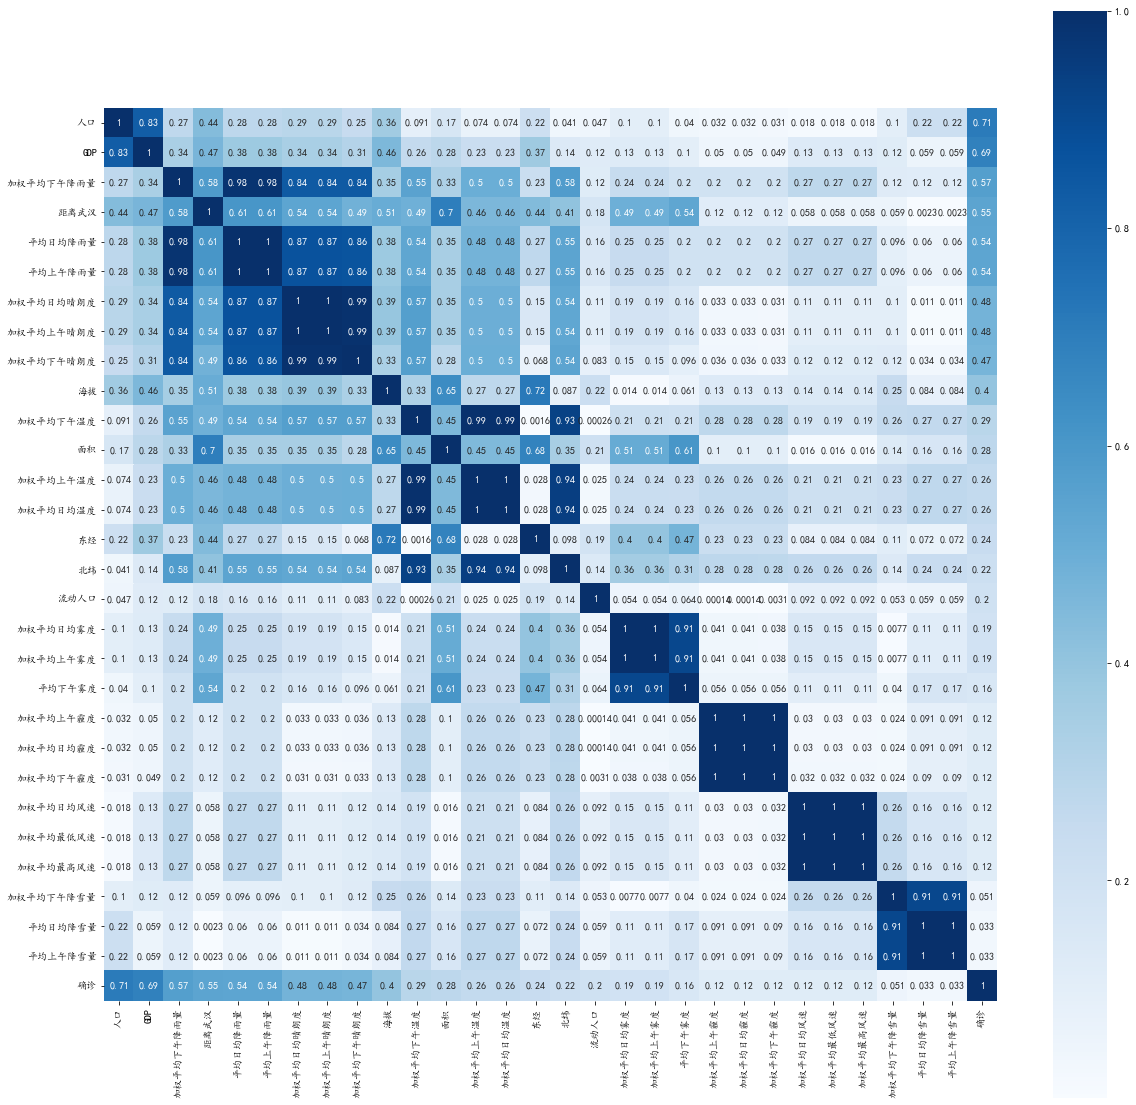

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

df_region_info_weather = df_standard[selected_factors + [selected_target]]
df_corr = df_region_info_weather.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

如上图，将相互强相关的特征数据，取其中一个：对“上午”、“下午”、“最高”、“最低”、“日均”取“日均”。如下图。

再次筛选后的特征和目标：人口、GDP、距离武汉、平均日均降雨量、加权平均日均晴朗度、海拔、面积、加权平均日均温度、东经、北纬、流动人口、加权平均日均雾度、加权平均日均霾度、加权平均日均风速、平均日均降雪量、确诊


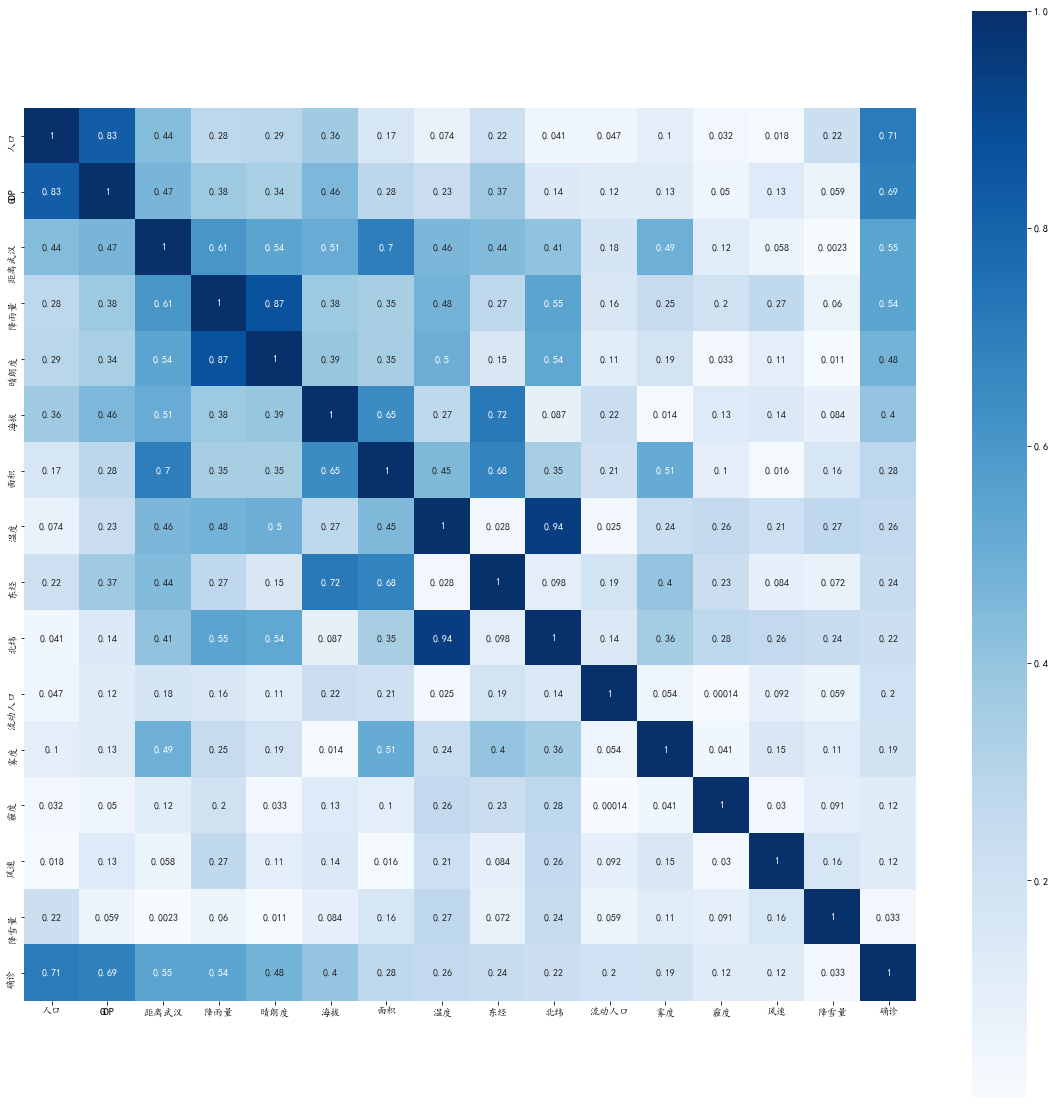

In [17]:
selected_cols = []
selected_col_short_names = []  # 后续对特征使用缩写的名称
for col in df_region_info_weather.columns:
    if '平均' in col:
        name = col.replace('加权', '').replace('上午', '').replace('下午', '').replace('最高', '')\
               .replace('最低', '').replace('日均', '')
        if '日均' in col:
            selected_cols.append(col)
            selected_col_short_names.append(name.replace('平均', ''))
    else:
        selected_cols.append(col)
        selected_col_short_names.append(col)
print('再次筛选后的特征和目标：{}'.format('、'.join(selected_cols)))
df_selected = df_region_info_weather[selected_cols]
df_selected.columns = selected_col_short_names
df_corr = df_selected.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

In [18]:
df_corr.iloc[-1:, :-1]

,人口,GDP,距离武汉,降雨量,晴朗度,海拔,面积,温度,东经,北纬,流动人口,雾度,霾度,风速,降雪量
确诊,0.713974,0.691302,-0.546257,0.539629,-0.478082,-0.399088,-0.280048,0.259623,0.238763,-0.221525,0.20326,-0.191924,-0.121031,0.118886,0.032914


### 1.8. 相关性分析结论

In [19]:
corr_analysis = df_corr.iloc[-1:, :-1].T
corr_analysis.columns = ['和确诊的相关性（绝对值越大表示越相关）']
corr_info_dict = {
    '人口': ('人口越多的地区，被确诊的人数越多', '人口越少的地区，被确诊的人数越多'),
    'GDP': ('GDP 越高的地区，被确诊的人数越多', 'GDP 越低的地区，被确诊的人数越多'),
    '距离武汉': ('离武汉越远，被确诊的人数越多', '离武汉越近，被确诊的人数越多'),
    '降雨量': ('降雨量越多的地区，被确诊的人数越多', '降雨量越少的地区，被确诊的人数越多'),
    '晴朗度': ('天越晴的地区，被确诊的人数越多', '天越阴的地区，被确诊的人数越多'),
    '海拔': ('海拔越高的地区，被确诊的人数越多', '海拔越低的地区，被确诊的人数越多'),
    '面积': ('面积越大的地区，被确诊的人数越多', '面积越小的地区，被确诊的人数越多'),
    '温度': ('温度越高的地区，被确诊的人数越多', '温度越低的地区，被确诊的人数越多'),
    '流动人口': ('流动人口越高的地区，被确诊的人数越多', '流动人口越低的地区，被确诊的人数越多'),
    '东经': ('越东方的地区，被确诊的人数越多', '越北方的地区，被确诊的人数越多'),
    '北纬': ('越北方的地区，被确诊的人数越多', '越南方的地区，被确诊的人数越多'),
    '雾度': ('雾越多的地区，被确诊的人数越多', '雾越少的地区，被确诊的人数越多'),
    '霾度': ('霾越多的地区，被确诊的人数越多', '霾越少的地区，被确诊的人数越多'),
    '降雪量': ('降雪量越多的地区，被确诊的人数越多', '降雪量越少的地区，被确诊的人数越多'),
    '风速': ('风速越高的地区，被确诊的人数越多', '风速越低的地区，被确诊的人数越多'),
}
desc = []
for name, val in zip(corr_analysis.index, corr_analysis.values.reshape(-1)):
    if abs(val) > 0.1:
        if val > 0:
            desc.append(corr_info_dict[name][0])
        else:
            desc.append(corr_info_dict[name][1])
    else:
        desc.append('该因素几乎没有影响')
corr_analysis['新冠状病毒影响因素分析（影响力从高到低排序）'] = desc
pd.set_option('display.max_rows', 30)
corr_analysis

,和确诊的相关性（绝对值越大表示越相关）,新冠状病毒影响因素分析（影响力从高到低排序）
人口,0.713974,人口越多的地区，被确诊的人数越多
GDP,0.691302,GDP 越高的地区，被确诊的人数越多
距离武汉,-0.546257,离武汉越近，被确诊的人数越多
降雨量,0.539629,降雨量越多的地区，被确诊的人数越多
晴朗度,-0.478082,天越阴的地区，被确诊的人数越多
海拔,-0.399088,海拔越低的地区，被确诊的人数越多
面积,-0.280048,面积越小的地区，被确诊的人数越多
温度,0.259623,温度越高的地区，被确诊的人数越多
东经,0.238763,越东方的地区，被确诊的人数越多
北纬,-0.221525,越南方的地区，被确诊的人数越多


**近期出行参考：少出门，若必须出门，记得戴口罩，<font color=red>晴天、低温</font>时候出门相对安全一些，人多的地方别去。**

## 2. 疫情趋势分析

### 2.1. 查看各地每日新增确诊人数趋势图

In [20]:
from coronavirus_analyzer import CoronavirusAnalyzer
from util.util import Util
import pandas as pd
import datetime

# FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. 
# The converter was registered by pandas on import. Future versions of pandas will require you to 
# explicitly register matplotlib converters.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 初始化分析类
analyzer = CoronavirusAnalyzer('2020-01-29')

df_virus_daily_inc = analyzer.df_virus_daily_inc

regions = df_virus_daily_inc.columns.levels[0][df_virus_daily_inc.columns.codes[0][::4]]
df_virus_daily_inc_injured = analyzer.get_injured(df_virus_daily_inc)

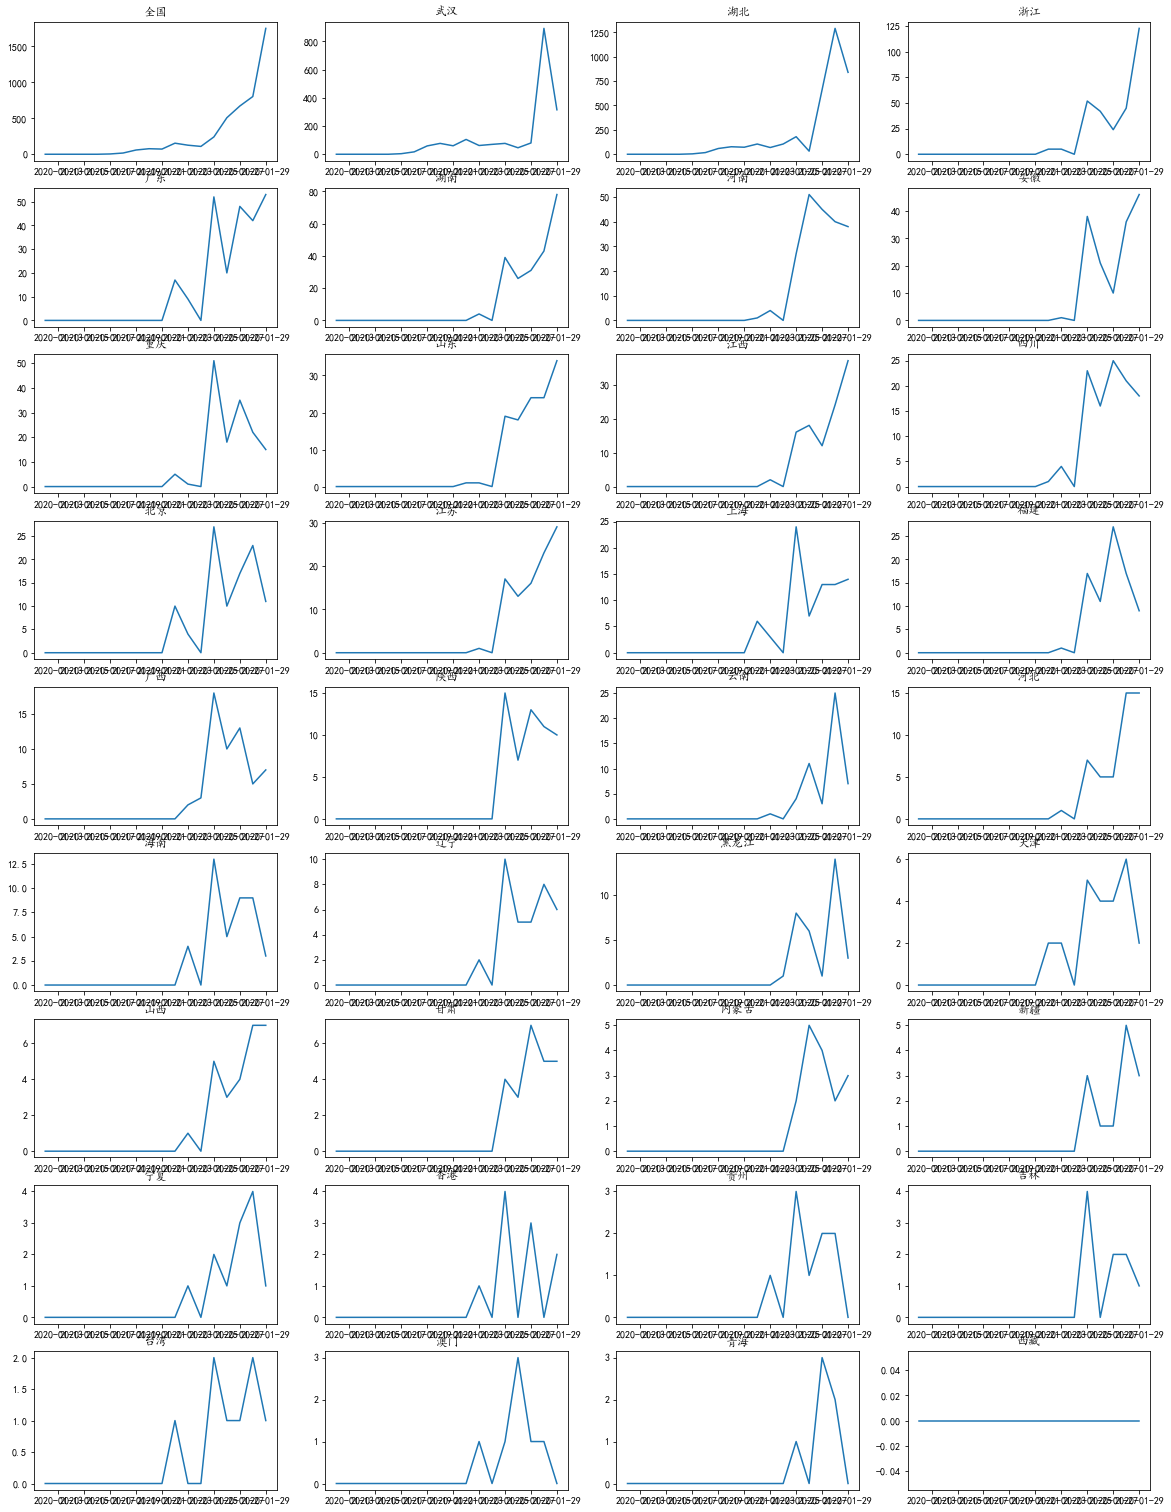

In [21]:
from util.util import Util
import matplotlib.pyplot as plt

analyzer.subplots(analyzer.df_virus_daily_inc_injured)

### 2.2. 分类
通过上面的图，可以看到一些相似趋势形状的图形，尝试用 max min 归一化，进行分类；但当前累计确诊人数全国各地差异较大，需要区别对待。

#### 2.2.1. 对各地当前累计确诊人数分类
将湖北、武汉区别出来，其他地区当前累计确诊人数用 k-means 分类

In [22]:
df_recent_daily_injured = analyzer.df_recent_daily_injured
omitted_regions = ['全国', '湖北', '武汉']
for region in omitted_regions:
    del df_recent_daily_injured[region]
clf, regions_by_cluster, cluster_centers = analyzer.k_means(df_recent_daily_injured, n_clusters=4, insure_sorted=True)
print('除了{}，累计确诊人数从高到低分 4 类：'.format('、'.join(omitted_regions)))
clusters_by_cum = {}
cum_desc = {0: '特多', 1: '多', 2: '中', 3: '少'}
for i, _ in enumerate(zip(cluster_centers.tolist(), regions_by_cluster)):
    center, cluster = _
    clusters_by_cum[i] = cluster
    print('簇中心：{}，分类：{}'.format(center, cluster))

除了全国、湖北、武汉，累计确诊人数从高到低分 4 类：
簇中心：[241.0]，分类：['浙江' '广东' '湖南' '河南']
簇中心：[119.71428571428572]，分类：['安徽' '重庆' '山东' '江西' '四川' '北京' '江苏']
簇中心：[59.714285714285715]，分类：['上海' '福建' '广西' '陕西' '云南' '河北' '海南']
簇中心：[15.666666666666671]，分类：['辽宁' '黑龙江' '天津' '山西' '甘肃' '内蒙古' '新疆' '宁夏' '香港' '贵州' '吉林' '台湾' '澳门' '青海'
 '西藏']


#### 2.2.2. 对各地每日新增确诊人数走势图进行分类

各数据离簇中心距离和：8.505202849409057


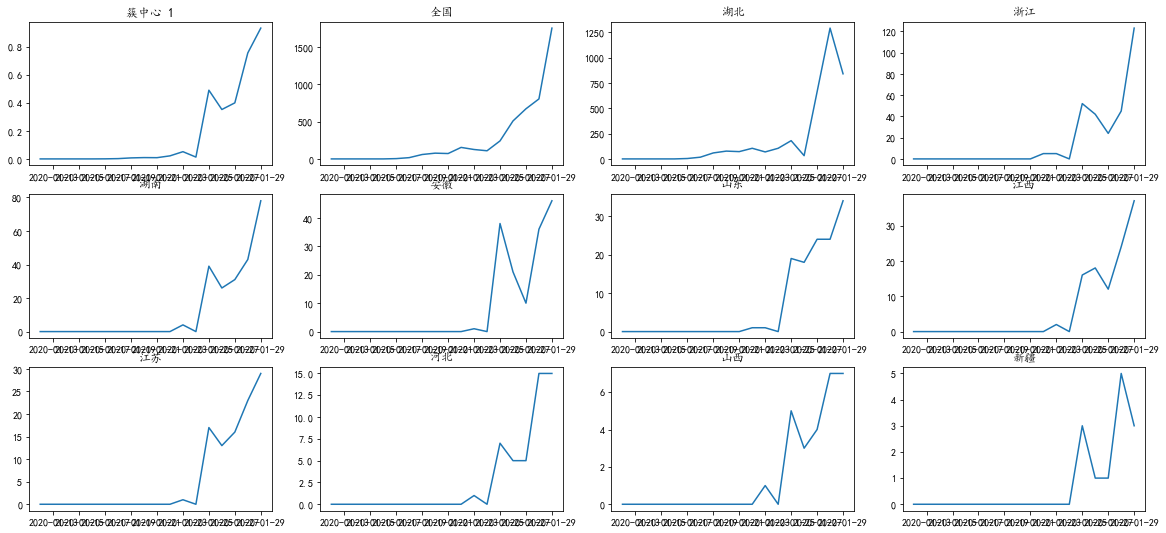

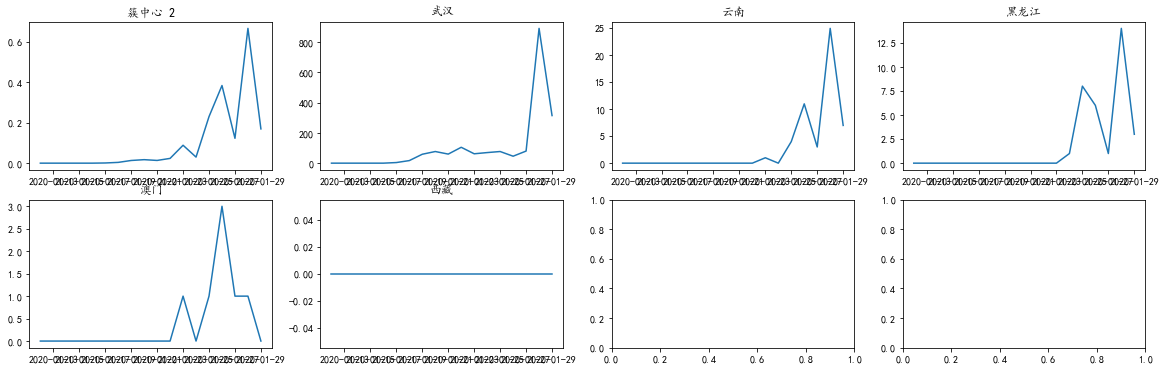

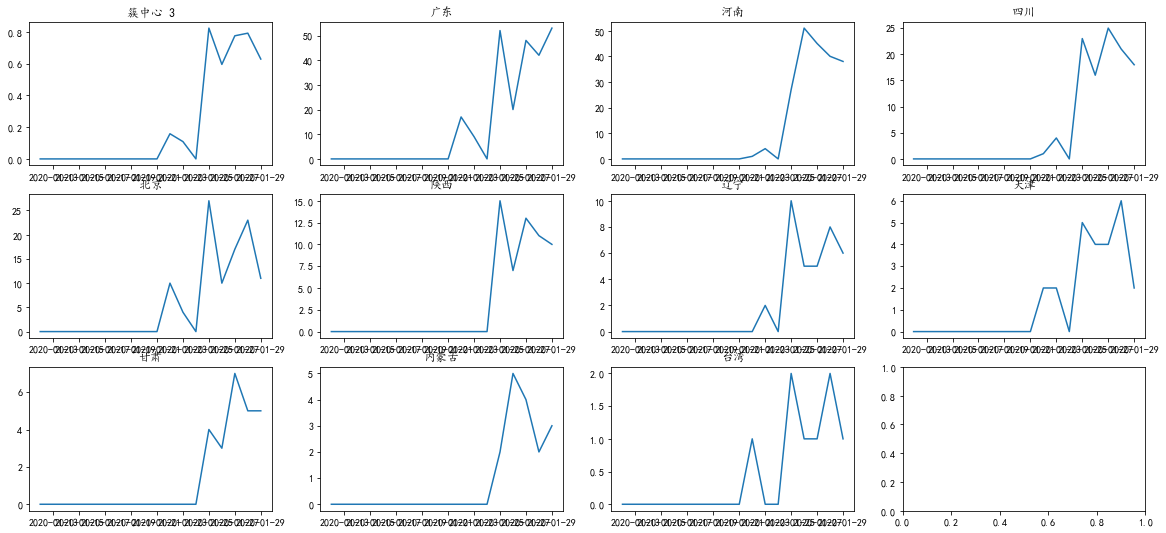

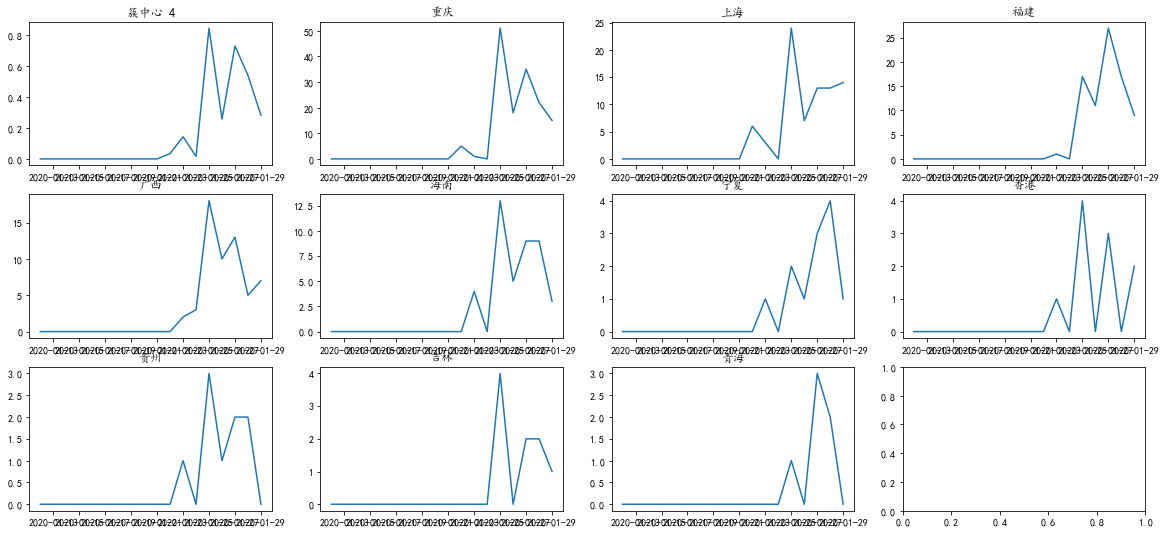

In [23]:
# 均匀分布归一化数据
from sklearn import preprocessing

n_clusters = 4

min_max_scaler = preprocessing.MinMaxScaler()
df_virus_daily_inc_injured = analyzer.df_virus_daily_inc_injured
X_min_max = min_max_scaler.fit_transform(df_virus_daily_inc_injured)
df_min_max = pd.DataFrame(X_min_max, index=df_virus_daily_inc_injured.index, 
                          columns=df_virus_daily_inc_injured.columns)
# for region in ['全国', '湖北', '武汉']:
#     del df_min_max[region]
clf, regions_by_cluster, cluster_centers = analyzer.k_means(
    df_min_max, n_clusters=4, max_iter=300, n_jobs=4, try_times=1000)
print('各数据离簇中心距离和：{}'.format(clf.inertia_))
df_cluster_center = pd.DataFrame(cluster_centers.T, index=df_min_max.index, 
                                 columns=['簇中心 {}'.format(_ + 1) for _ in range(n_clusters)])
clusters_by_inc = {}
for i, regions in enumerate(regions_by_cluster):
    clusters_by_inc[i] = regions
    df = df_cluster_center.iloc[:, [i]]
    df = pd.concat([df, df_virus_daily_inc_injured[regions]], axis=1)
    print('=' * 100)
    analyzer.subplots(df)

In [24]:
inc_desc = {0: '趋势向上', 1: '近期有较大下降', 2: '近期比较稳定', 3: '近期回落最明显'}
text = \
'''
如上图，分 4 类情况下：

第 1 类：{}的，有：{}

第 2 类：{}的，有：{}

第 3 类：{}的，有：{}

第 4 类：{}的，有：{}
'''.format(inc_desc[0], regions_by_cluster[0], inc_desc[1], regions_by_cluster[1], 
           inc_desc[2], regions_by_cluster[2], inc_desc[3], regions_by_cluster[3])
print(text)


如上图，分 4 类情况下：

第 1 类：趋势向上的，有：['全国' '湖北' '浙江' '湖南' '安徽' '山东' '江西' '江苏' '河北' '山西' '新疆']

第 2 类：近期有较大下降的，有：['武汉' '云南' '黑龙江' '澳门' '西藏']

第 3 类：近期比较稳定的，有：['广东' '河南' '四川' '北京' '陕西' '辽宁' '天津' '甘肃' '内蒙古' '台湾']

第 4 类：近期回落最明显的，有：['重庆' '上海' '福建' '广西' '海南' '宁夏' '香港' '贵州' '吉林' '青海']



#### 2.2.3. 对上面两种分类汇总如下

In [26]:
import numpy as np
pd.set_option('display.max_rows', 50)
region_to_cum_id = {}
region_to_inc_id = {}
clusters_by_cum[-1] = omitted_regions
for region_dict, clusters, desc in zip([region_to_cum_id, region_to_inc_id], 
                                 [clusters_by_cum, clusters_by_inc],
                                 [cum_desc, inc_desc]):
    for cluster_id, regions in clusters.items():
        for region in regions:
            if cluster_id == -1:
                cluster_id = 0
            val = desc[cluster_id]
            region_dict[region] = '{}'.format(val)
df_clusters = pd.DataFrame([pd.Series(region_to_cum_id), pd.Series(region_to_inc_id)]).T
df_clusters.columns = ['人数', '趋势']
df_clusters.fillna('特多', inplace=True)
df_clusters['人数'] = pd.Categorical(df_clusters['人数'], ordered=True, categories=cum_desc.values())
df_clusters['趋势'] = pd.Categorical(df_clusters['趋势'], ordered=True, categories=inc_desc.values())
df_clusters = df_clusters.sort_values(by=df_clusters.columns.tolist())
df_clusters

,人数,趋势
浙江,特多,趋势向上
湖南,特多,趋势向上
全国,特多,趋势向上
湖北,特多,趋势向上
武汉,特多,近期有较大下降
广东,特多,近期比较稳定
河南,特多,近期比较稳定
安徽,多,趋势向上
山东,多,趋势向上
江西,多,趋势向上
